In [51]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re

In [24]:
data = pd.read_csv('Resources/mbti_1.csv')
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [29]:
data['num_of_posts']= [len([x for x in post.split('|||') if len(x)>0]) for post in data['posts']]

In [30]:
data.head()

,type,posts,num_of_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,50
1,ENTP,'I'm finding the lack of me in these posts ver...,50
2,INTP,'Good one _____ https://www.youtube.com/wat...,50
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",50
4,ENTJ,'You're fired.|||That's another silly misconce...,50


In [39]:
#create columns for individual letters 
for index, row in data.iterrows(): 
    mbti_type = list(row['type'])
    data.loc[index,'IorE']=mbti_type[0]
    data.loc[index,'SorN']=mbti_type[1]
    data.loc[index,'TorF']=mbti_type[2]
    data.loc[index,'PorJ']=mbti_type[3]

In [77]:
data['IorE'].value_counts()

I    6676
E    1999
Name: IorE, dtype: int64

In [78]:
data['SorN'].value_counts()

N    7478
S    1197
Name: SorN, dtype: int64

In [79]:
data['TorF'].value_counts()

F    4694
T    3981
Name: TorF, dtype: int64

In [80]:
data['PorJ'].value_counts()

P    5241
J    3434
Name: PorJ, dtype: int64

In [41]:
data = data[['type','IorE','SorN','TorF','PorJ','posts','num_of_posts']]

In [34]:
data['posts'][4].split('|||')

["'You're fired.",
 "That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to.   Nobody wants to be approached with BS...",
 "But guys... he REALLY wants to go on a super-duper-long-ass vacation. C'mon guys. His boss just doesn't listen or get it. He even approached him logically and everything.",
 'Never mind. Just go on permanent vacation.',
 "Two months? I wouldn't be crazy about the idea. If you are really his best employee, then that's what may be cooking him. Who wants their most reliable asset gone for that long?  ENTJ employer...",
 'Lol. Its not like our views were unsolicited. What a victim.',
 'Sometimes I just really like impoverished rap music.   https://www.youtube.com/watch?v=Xh0vA6_8mv8',
 "I probably would have lost it too. His stonewalling was insignificant. He was being an idiot over semantics that didn't have any impact on anything. It's one thing to stone wall on critical shit

# Evaluating Number of Posts as a Feature 

Number of Posts is not a good feature to use - majority of the population is posting more than 45 posts 

Text(0.5, 1.0, 'P vs J')

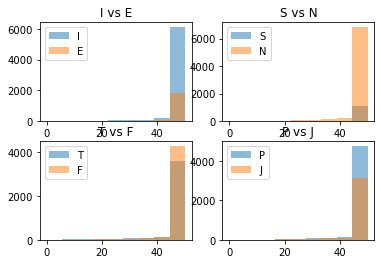

In [69]:
bins = np.linspace(0,50,10)
fig, axs = plt.subplots(2,2) 
axs[0, 0].hist(data[data['IorE']=='I']['num_of_posts'], bins, alpha=0.5, label='I')
axs[0, 0].hist(data[data['IorE']=='E']['num_of_posts'], bins, alpha=0.5, label='E')
axs[0, 0].legend(loc='upper left')
axs[0, 0].set_title('I vs E')

axs[0, 1].hist(data[data['SorN']=='S']['num_of_posts'], bins, alpha=0.5, label='S')
axs[0, 1].hist(data[data['SorN']=='N']['num_of_posts'], bins, alpha=0.5, label='N')
axs[0, 1].legend(loc='upper left')
axs[0, 1].set_title('S vs N')


axs[1, 0].hist(data[data['TorF']=='T']['num_of_posts'], bins, alpha=0.5, label='T')
axs[1, 0].hist(data[data['TorF']=='F']['num_of_posts'], bins, alpha=0.5, label='F')
axs[1, 0].legend(loc='upper left')
axs[1, 0].set_title('T vs F')

axs[1, 1].hist(data[data['PorJ']=='P']['num_of_posts'], bins, alpha=0.5, label='P')
axs[1, 1].hist(data[data['PorJ']=='J']['num_of_posts'], bins, alpha=0.5, label='J')
axs[1, 1].legend(loc='upper left')
axs[1, 1].set_title('P vs J')


# Evaluating Youtube references as a Feature 

In [54]:
data['ref_YT']= [post.count('youtube') for post in data['posts']]

Text(0.5, 1.0, 'P vs J')

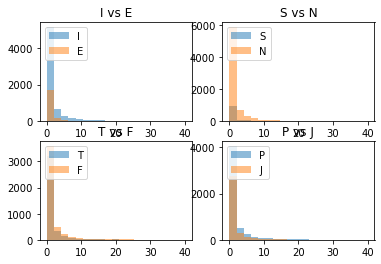

In [68]:
fig, axs = plt.subplots(2,2) 
bins = np.linspace(0,40,20)

axs[0, 0].hist(data[data['IorE']=='I']['ref_YT'], bins, alpha=0.5, label='I')
axs[0, 0].hist(data[data['IorE']=='E']['ref_YT'], bins, alpha=0.5, label='E')
axs[0, 0].legend(loc='upper left')
axs[0, 0].set_title('I vs E')

axs[0, 1].hist(data[data['SorN']=='S']['ref_YT'], bins, alpha=0.5, label='S')
axs[0, 1].hist(data[data['SorN']=='N']['ref_YT'], bins, alpha=0.5, label='N')
axs[0, 1].legend(loc='upper left')
axs[0, 1].set_title('S vs N')


axs[1, 0].hist(data[data['TorF']=='T']['ref_YT'], bins, alpha=0.5, label='T')
axs[1, 0].hist(data[data['TorF']=='F']['ref_YT'], bins, alpha=0.5, label='F')
axs[1, 0].legend(loc='upper left')
axs[1, 0].set_title('T vs F')

axs[1, 1].hist(data[data['PorJ']=='P']['ref_YT'], bins, alpha=0.5, label='P')
axs[1, 1].hist(data[data['PorJ']=='J']['ref_YT'], bins, alpha=0.5, label='J')
axs[1, 1].legend(loc='upper left')
axs[1, 1].set_title('P vs J')


In [81]:
data['countPunct']= [len(re.findall('!',post)) for post in data['posts']]

In [74]:
re.findall('[?!.]',data['posts'][4])

['.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '?',
 '.',
 '.',
 '?',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '?',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '?',
 '?',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '?',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '!',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '?',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '?',
 '?',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '?',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.']

Text(0.5, 1.0, 'P vs J')

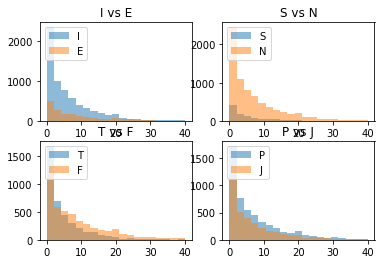

In [82]:
fig, axs = plt.subplots(2,2) 
bins = np.linspace(0,40,20)

axs[0, 0].hist(data[data['IorE']=='I']['countPunct'], bins, alpha=0.5, label='I')
axs[0, 0].hist(data[data['IorE']=='E']['countPunct'], bins, alpha=0.5, label='E')
axs[0, 0].legend(loc='upper left')
axs[0, 0].set_title('I vs E')

axs[0, 1].hist(data[data['SorN']=='S']['countPunct'], bins, alpha=0.5, label='S')
axs[0, 1].hist(data[data['SorN']=='N']['countPunct'], bins, alpha=0.5, label='N')
axs[0, 1].legend(loc='upper left')
axs[0, 1].set_title('S vs N')


axs[1, 0].hist(data[data['TorF']=='T']['countPunct'], bins, alpha=0.5, label='T')
axs[1, 0].hist(data[data['TorF']=='F']['countPunct'], bins, alpha=0.5, label='F')
axs[1, 0].legend(loc='upper left')
axs[1, 0].set_title('T vs F')

axs[1, 1].hist(data[data['PorJ']=='P']['countPunct'], bins, alpha=0.5, label='P')
axs[1, 1].hist(data[data['PorJ']=='J']['countPunct'], bins, alpha=0.5, label='J')
axs[1, 1].legend(loc='upper left')
axs[1, 1].set_title('P vs J')
